In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install  /content/tw_matplotlib_src-1.0.0-py3-none-any.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./tw_matplotlib_src-1.0.0-py3-none-any.whl
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/content/tw_matplotlib_src-1.0.0-py3-none-any.whl'



In [ ]:
import pandas as pd
#處理圖表用
import numpy as np
import math
#處理運算用
import matplotlib.pyplot as plt

import matplotlib
%matplotlib inline
#畫圖用的
import datetime as dt
#把文字轉成時間用的
import yfinance as yf
#本次核心，下載資料用的

import seaborn as sns
import plotly.express as px
# pkg for interactive vis

import warnings
warnings.filterwarnings('ignore')
#把warning省略掉

In [ ]:
# Se matplotlib style

plt.style.use
("fivethirtyeight")

'fivethirtyeight'

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# define color style for output printing

W  = '\033[0m'  # white (normal)
K  = '\033[30m' # black
R  = '\033[31m' # red
G  = '\033[32m' # green
O  = '\033[1;33m' # orange
B  = '\033[34m' # blue
P  = '\033[35m' # purple
T =  '\033[1;33;47m' #Title

In [ ]:
TMSC="2330.TW"
GC="6488.TWO"
APPLE="AAPL"
INTEL="INTC"

In [ ]:
# Set of selected ticks

ticks=[TMSC,GC,APPLE,INTEL]

In [ ]:
# time of period considered

start = dt.datetime(2016, 7, 1)
#同理。這邊把日期寫成變數只是求整潔，你爽的話也可以直接整個函數打上去。
#end = dt.datetime(2022, 2, 10)
end = dt.datetime.today()

In [ ]:
df_1=yf.download(ticks, start, end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1766 entries, 2016-07-01 to 2023-04-21
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   2330.TW   1657 non-null   float64
 1   6488.TWO  1656 non-null   float64
 2   AAPL      1713 non-null   float64
 3   INTC      1713 non-null   float64
dtypes: float64(4)
memory usage: 69.0 KB


In [ ]:
df_1.head(20)

,2330.TW,6488.TWO,AAPL,INTC
Date,,,,
2016-07-01,137.452133,52.509285,22.165976,26.982990
2016-07-04,137.452133,52.214294,NaN,NaN
2016-07-05,135.796112,52.361794,21.957930,26.925314
2016-07-06,133.726013,51.845547,22.082752,27.164249
2016-07-07,136.210083,52.288048,22.177532,27.353754
2016-07-08,136.210083,NaN,22.348591,28.012880
2016-07-11,140.764236,52.804287,22.417938,28.325966
2016-07-12,141.592285,49.411835,22.519640,28.787352
2016-07-13,139.522202,54.273319,22.392508,28.845024


In [ ]:
def pd_index_to_YYYY_MM_DD(df):
    df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')
    return df
df_1=pd_index_to_YYYY_MM_DD(df_1)

df_1.head(10)

,2330.TW,6488.TWO,AAPL,INTC
Date,,,,
2016-07-01,137.452133,52.509285,22.165976,26.982990
2016-07-04,137.452133,52.214294,NaN,NaN
2016-07-05,135.796112,52.361794,21.957930,26.925314
2016-07-06,133.726013,51.845547,22.082752,27.164249
2016-07-07,136.210083,52.288048,22.177532,27.353754
2016-07-08,136.210083,NaN,22.348591,28.012880
2016-07-11,140.764236,52.804287,22.417938,28.325966
2016-07-12,141.592285,49.411835,22.519640,28.787352
2016-07-13,139.522202,54.273319,22.392508,28.845024


In [ ]:
def pd_sum_same_date_index(df):
    df = df.groupby(df.index).sum()
    return df
df_1=pd_sum_same_date_index(df_1)
df_1.head(20)  

,2330.TW,6488.TWO,AAPL,INTC
Date,,,,
2016-07-01,137.452133,52.509285,22.165976,26.982990
2016-07-04,137.452133,52.214294,0.000000,0.000000
2016-07-05,135.796112,52.361794,21.957930,26.925314
2016-07-06,133.726013,51.845547,22.082752,27.164249
2016-07-07,136.210083,52.288048,22.177532,27.353754
2016-07-08,136.210083,0.000000,22.348591,28.012880
2016-07-11,140.764236,52.804287,22.417938,28.325966
2016-07-12,141.592285,49.411835,22.519640,28.787352
2016-07-13,139.522202,54.273319,22.392508,28.845024


In [ ]:
df_1 = df_1.replace(0, np.nan)

df_1 = df_1.fillna(method='ffill')
df_1.head(20)

,2330.TW,6488.TWO,AAPL,INTC
Date,,,,
2016-07-01,137.452133,52.509285,22.165976,26.982990
2016-07-04,137.452133,52.214294,22.165976,26.982990
2016-07-05,135.796112,52.361794,21.957930,26.925314
2016-07-06,133.726013,51.845547,22.082752,27.164249
2016-07-07,136.210083,52.288048,22.177532,27.353754
2016-07-08,136.210083,52.288048,22.348591,28.012880
2016-07-11,140.764236,52.804287,22.417938,28.325966
2016-07-12,141.592285,49.411835,22.519640,28.787352
2016-07-13,139.522202,54.273319,22.392508,28.845024


In [ ]:
# fill nan forword
df_1.fillna(method="ffill",inplace=True)

In [ ]:
df=df_1[1:].copy()

In [ ]:
df.tail(20)

,2330.TW,6488.TWO,AAPL,INTC
Date,,,,
2023-03-27,531.0,528.0,158.279999,29.180000
2023-03-28,525.0,517.0,157.649994,29.290001
2023-03-29,530.0,511.0,160.770004,31.520000
2023-03-30,535.0,515.0,162.360001,32.090000
2023-03-31,533.0,518.0,164.899994,32.669998
2023-04-03,533.0,518.0,166.169998,32.889999
2023-04-04,533.0,518.0,165.630005,33.099998
2023-04-05,533.0,518.0,163.759995,32.830002
2023-04-06,530.0,512.0,164.660004,32.810001


<Axes: title={'center': ' 股價'}, xlabel='Date'>

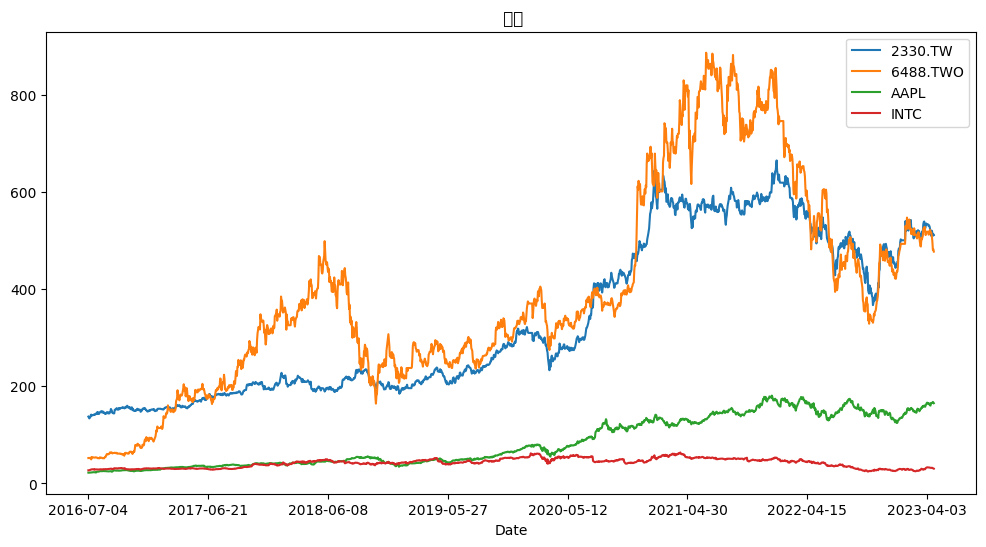

In [ ]:
#np.log(df).plot(figsize=[12,6])
df.plot(figsize=[12,6],title=" 股價")

<Axes: title={'center': ' 對數股價'}, xlabel='Date'>

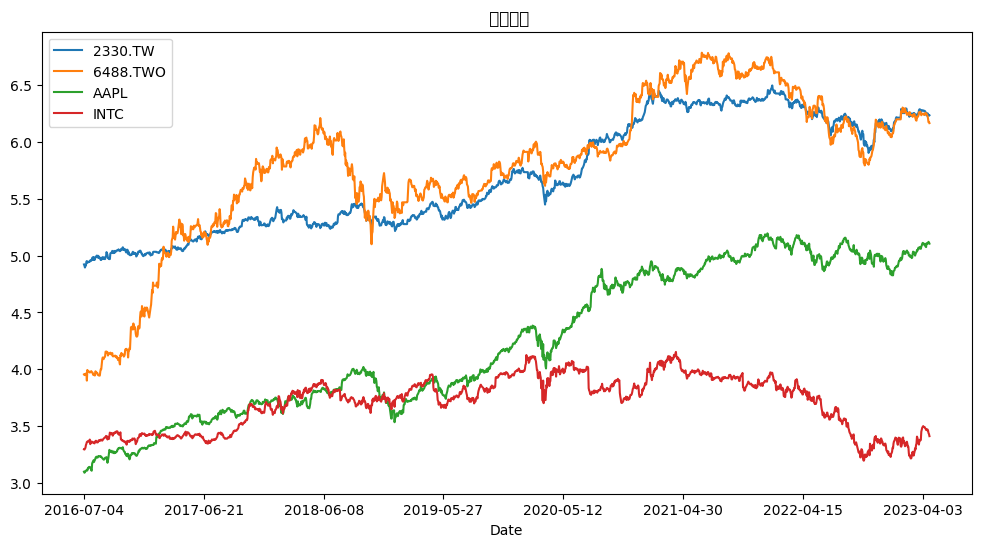

In [ ]:
np.log(df).plot(figsize=[12,6],title=" 對數股價")

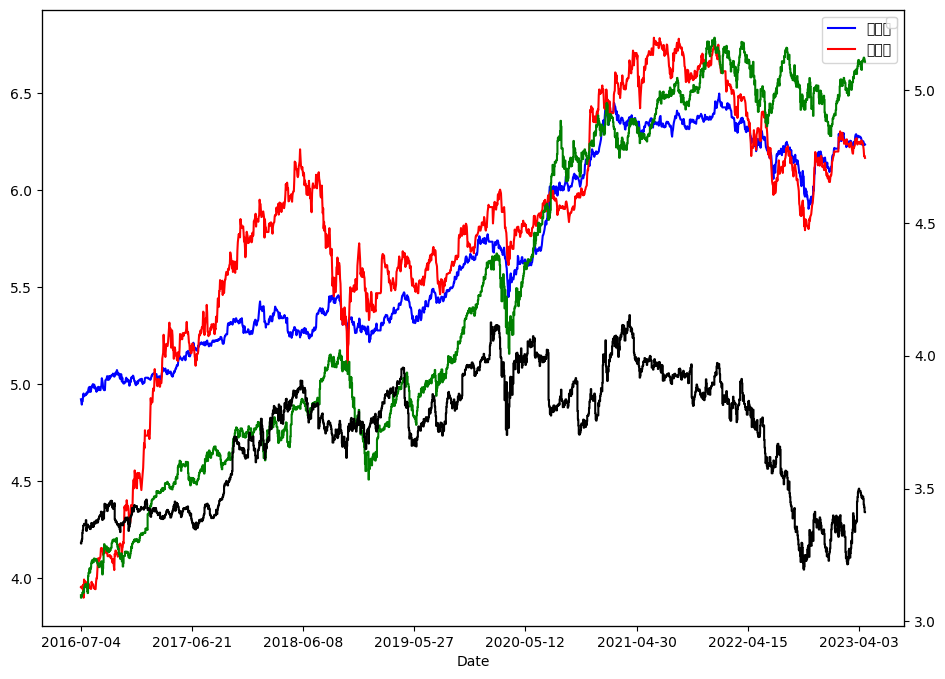

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax2 = ax.twinx()
#rspine = ax2.spines['right']
#rspine.set_position(('axes', 1.15))
#ax2.set_frame_on(True)
#ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

np.log(df['2330.TW']).plot(ax=ax, style='b-',label=" 台積電收盤價 ")
# same ax as above since it's automatically added on the right
np.log(df['6488.TWO']).plot(ax=ax, style='r-',label=" 環球晶收盤價 ")#, secondary_y=True,drawstyle="steps")
#df_gigabytes['Adj Close'].plot(ax=ax, style='g-', secondary_y=True,drawstyle="steps")
np.log(df['AAPL']).plot(ax=ax2, style='g-', secondary_y=True,drawstyle="steps")
np.log(df['INTC']).plot(ax=ax2, style='k-', secondary_y=True,drawstyle="steps")
# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
#ax2.legend([ax.get_lines()[0],  ax2.get_lines()[0],ax.right_ax.get_lines()[0]],\
#             ['台積電','環球晶','Apple','Intel'], bbox_to_anchor=(1.5, 0.5))
#ax.legend()
ax.legend(['台積電','環球晶'],loc=0)
ax2.legend(['台積電','環球晶'],loc=0)

In [ ]:
ax2.legend?

In [ ]:
df.head()

,2330.TW,6488.TWO,AAPL,INTC
Date,,,,
2016-07-04,137.452133,52.214294,22.165976,26.982990
2016-07-05,135.796112,52.361794,21.957930,26.925314
2016-07-06,133.726013,51.845547,22.082752,27.164249
2016-07-07,136.210083,52.288048,22.177532,27.353754
2016-07-08,136.210083,52.288048,22.348591,28.012880


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1765 entries, 2016-07-04 to 2023-04-21
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   2330.TW   1765 non-null   float64
 1   6488.TWO  1765 non-null   float64
 2   AAPL      1765 non-null   float64
 3   INTC      1765 non-null   float64
dtypes: float64(4)
memory usage: 68.9+ KB


In [ ]:
# create return feature of each tick

for tick in ticks:
    tick_=tick+'_pct'
    df[tick_]=0
    df[tick_][1:]=df[tick].pct_change()[1:]

In [ ]:
df.head()

,2330.TW,6488.TWO,AAPL,INTC,2330.TW_pct,6488.TWO_pct,AAPL_pct,INTC_pct
Date,,,,,,,,
2016-07-04,137.452133,52.214294,22.165976,26.982990,0.000000,0.000000,0.000000,0.000000
2016-07-05,135.796112,52.361794,21.957930,26.925314,-0.012048,0.002825,-0.009386,-0.002138
2016-07-06,133.726013,51.845547,22.082752,27.164249,-0.015244,-0.009859,0.005685,0.008874
2016-07-07,136.210083,52.288048,22.177532,27.353754,0.018576,0.008535,0.004292,0.006976
2016-07-08,136.210083,52.288048,22.348591,28.012880,0.000000,0.000000,0.007713,0.024096


In [33]:
fig=px.line(df)
fig.show()

In [32]:
from IPython.display import HTML

In [34]:
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

<Axes: ylabel='Density'>

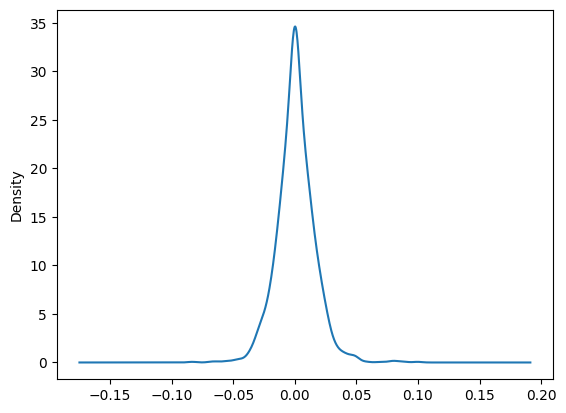

In [35]:
df['2330.TW_pct'].plot(kind='kde')

<Axes: xlabel='Daily Profix of TMSC', ylabel='Density'>

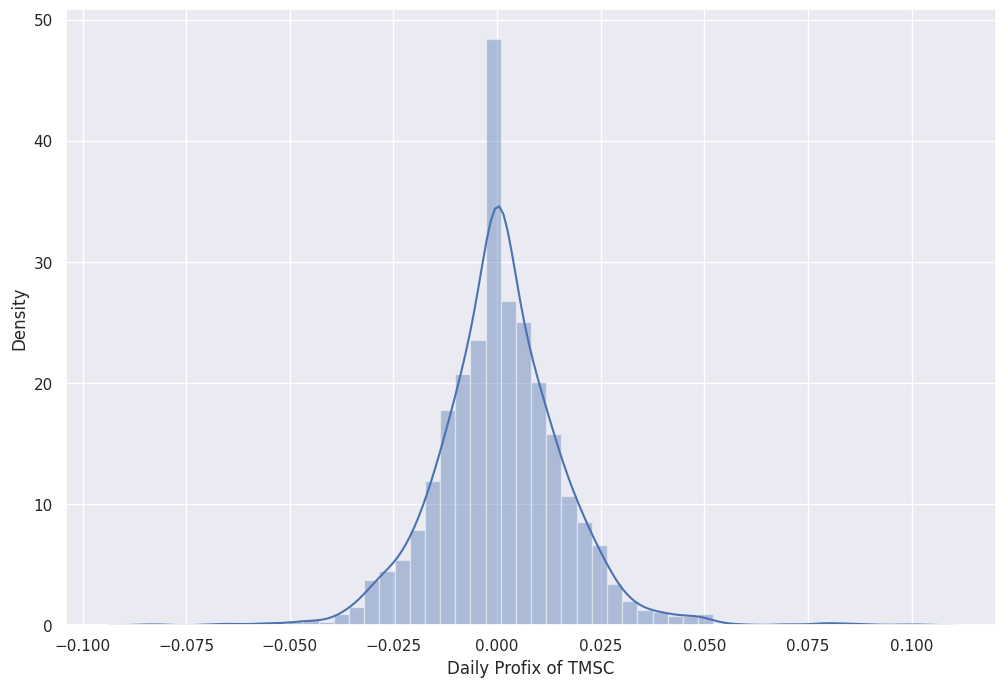

In [36]:
sns.set(rc={'figure.figsize':(12,8)})

from scipy.stats import norm

x = pd.Series(df['2330.TW_pct'], name="Daily Profix of TMSC")

# Plot the distribution with a histogram and maximum likelihood gaussian distribution fit:
sns.distplot(x)#, fit=norm, kde=False);

In [37]:
from scipy.stats import norm
from scipy.stats import kstest,normaltest,shapiro

def normal_test(data_,alpha=0.05):

    #test_=kstest(data_,'norm')
    #test_=shapiro(data_)
    test_=normaltest(data_)
    p= test_.pvalue
    stat=test_.statistic
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
       print('Ho: Normal distributed with significance level α = %.2f, p-valaue = %.2f' %(alpha,p))
    else:
       print(R+'H1: Reject normal distributed with significance level α = %.2f, (p-valaue = %.2f)' %(alpha,p))  

In [38]:
df['2330.TW_pct']

Date
2016-07-04    0.000000
2016-07-05   -0.012048
2016-07-06   -0.015244
2016-07-07    0.018576
2016-07-08    0.000000
                ...   
2023-04-17    0.007752
2023-04-18   -0.009615
2023-04-19   -0.009709
2023-04-20    0.005882
2023-04-21   -0.003899
Name: 2330.TW_pct, Length: 1765, dtype: float64

In [39]:
data=df['2330.TW_pct'].values
normal_test(data,alpha=0.05)

stat=204.255, p=0.000
H1: Reject normal distributed with significance level α = 0.05, (p-valaue = 0.00)


In [40]:
data=df['AAPL_pct'].values
normal_test(data,alpha=0.05)

stat=220.996, p=0.000
H1: Reject normal distributed with significance level α = 0.05, (p-valaue = 0.00)
